In [1]:
import numpy as np
from scipy import linalg as lin
from matplotlib import pyplot as plt
%matplotlib inline

# Question 4.1.

The data kernel is a matrix:

$$ G = \left(
    \begin{array}{cccccc}
      1 & 1 & 1 & 0 & 0 & \ldots & 0 \\
      0 & 1 & 1 & 1 & 0 & \ldots & 0 \\
      \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
      0 & 0 & \ldots & 1 & 1 & 1 & 0 \\
      0 & \ldots & 0 & 0 & 1 & 1 & 1
    \end{array}
  \right) $$
  
with 98 rows and 100 columns.

In [2]:
Nx, Ny = (100, 98)

In [3]:
G = np.zeros((Ny, Nx))

for j in range(Ny):
        G[j, j] = 1
        G[j, j+1] = 1
        G[j, j+2] = 1

In [4]:
G

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.]])

The underdetermined inverse $G^{-g}_{Dir}$ with the Dirichlet spread function is:

$$ G^{-g}_{Dir} = G^T \big[ G G^T \big]^{-1} $$

and the model resolution matrix is

$$ R_{Dir} = G^{-g}_{Dir} G $$

In [10]:
epsilon1 = 0.

G1g_dir = np.dot( G.T, lin.inv( np.dot( G, G.T ) ) )

R1res_dir = np.dot( G1g_dir, G ) 

For the Backus-Gilbert underdetermined inverse, $G^{-g}_{BG}$ each element is derived as:

$$ {G^{-g}_{BG}}_{kl} = \frac{\sum_{i=1}^N u_i \bigg[ \big( S^{(k)} \big)^{-1} \bigg]_{il}}{\sum_{i=1}^N \sum_{j=1}^N u_i \bigg[ \big( S^{(k)} \big)^{-1} \bigg]_{ij} u_j} $$

where 

$$ S_{ij}^{(k)} \equiv \sum_{l=1}^M w(l,k) G_{il} G_{jl}, \ \ \ \ w(i,j) = (i-j)^2, \ \ \ \ u_j \equiv \sum_{k=1}^M G_{jk} $$

In [6]:
# W1 = np.arange(0, Ny)

S1 = np.empty((Nx, Ny, Ny))
u = np.empty(Ny)

for k in range(Nx):
    for i in range(Ny):
        for j in range(Ny):
            u[j] = G[j].sum()
            
            s = 0.
            for l in range(Nx):
                s += ( l - k )**2 * G[i,l] * G[j,l]
                
            S1[k,i,j] = s

In [7]:
G1g_BG = np.empty((Nx, Ny))     # shape: [100 x 98]
dom = np.empty(Ny)

for k in range(Nx):           # Nx = 100
    S1_inv = lin.inv(S1[k])
    for l in range(Ny):        # Ny = 98
        
        for i in range(Ny):
            temp = 0.
            for j in range(Ny):
                temp += S1_inv[i,j] * u[j]
            dom[i] = u[i] * temp
                
        G1g_BG[k,l] = ( u*S1_inv[:,l] ).sum() / dom.sum()

In [11]:
R1res_BG = np.dot( G1g_BG, G )

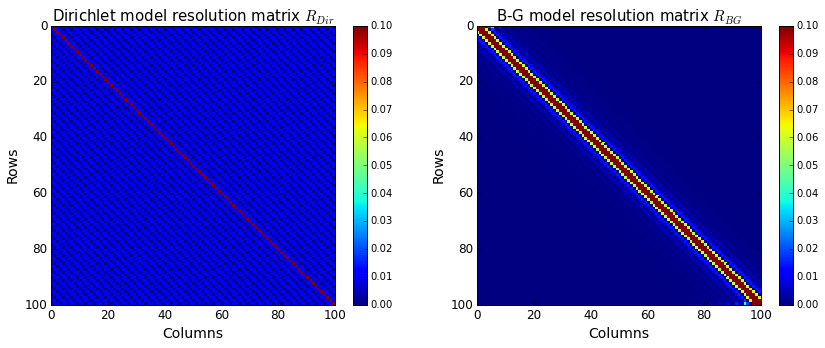

In [25]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(121)
cax1 = ax1.pcolormesh( R1res_dir, vmin=0., vmax=.1 ) 
cbar = fig.colorbar(cax1)
ax1.set_title('Dirichlet model resolution matrix $R_{Dir}$', fontsize=15)
ax1.set_ylabel('Rows', fontsize=14)
ax1.set_xlabel('Columns', fontsize=14)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )
plt.gca().invert_yaxis()

ax2 = fig.add_subplot(122)
cax2 = ax2.pcolormesh( R1res_BG, vmin=0., vmax=.1 )
cbar = fig.colorbar(cax2)
ax2.set_title('B-G model resolution matrix $R_{BG}$', fontsize=15)
ax2.set_ylabel('Rows', fontsize=14)
ax2.set_xlabel('Columns', fontsize=14)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )
plt.gca().invert_yaxis()

## Comments

Taking note that the colorbars for both figures are the same, we see larger sidelobes for the Dirichlet model resolution matrix, $R_{Dir}$ than the Backus-Gilbert model resolution matrix, $R_{BG}$, but $R_{Dir}$ has a sharper peak for the diagonal elements in the matrix.

# Question 4.2.

The weight function is:

$$ w(i,j) = \big| i - j \big|^{1/2} $$

In [19]:
# W2 = np.arange(0, Ny)

S2 = np.empty((Nx, Ny, Ny))

for k in range(Nx):
    for i in range(Ny):
        for j in range(Ny):
            
            s = 0.
            for l in range(Nx):
                s += np.sqrt( np.abs( l - k ) ) * G[i,l] * G[j,l]
                
            S2[k,i,j] = s

In [20]:
G2g_BG = np.empty((Nx, Ny))     # shape: [100 x 98]
dom = np.empty(Ny)

for k in range(Nx):           # Nx = 100
    S2_inv = lin.inv(S2[k])
    for l in range(Ny):        # Ny = 98
        
        for i in range(Ny):
            temp = 0.
            for j in range(Ny):
                temp += S2_inv[i,j] * u[j]
            dom[i] = u[i] * temp
                
        G2g_BG[k,l] = ( u*S2_inv[:,l] ).sum() / dom.sum()

In [22]:
R2res_BG = np.dot( G2g_BG, G )

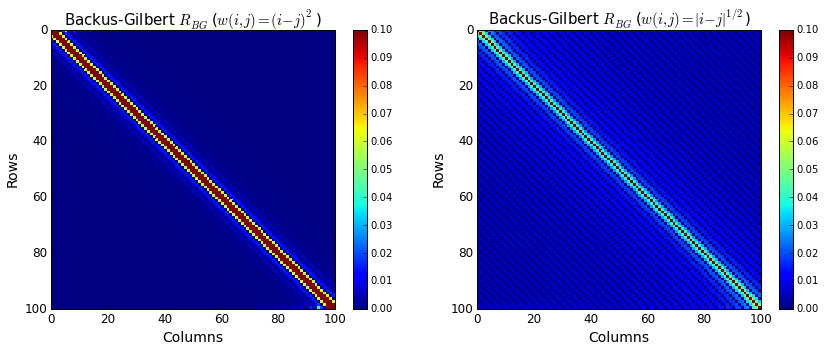

In [26]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(121)
cax1 = ax1.pcolormesh( R1res_BG, vmin=0., vmax=.1 )
cbar = fig.colorbar(cax1)
ax1.set_title('Backus-Gilbert $R_{BG}$ ($w(i,j) = (i-j)^2$)', fontsize=15)
ax1.set_ylabel('Rows', fontsize=14)
ax1.set_xlabel('Columns', fontsize=14)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )
plt.gca().invert_yaxis()

ax2 = fig.add_subplot(122)
cax2 = ax2.pcolormesh( R2res_BG, vmin=0., vmax=.1 )
cbar = fig.colorbar(cax2)
ax2.set_title('Backus-Gilbert $R_{BG}$ ($w(i,j) = |i-j|^{1/2}$)', fontsize=15)
ax2.set_ylabel('Rows', fontsize=14)
ax2.set_xlabel('Columns', fontsize=14)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )
plt.gca().invert_yaxis()

## Comments

Since the later weight function $w(i,j) = \big| i - j \big|^{1/2}$ gives less weight to distant sidelobes, we see that the model resolution matrix, $R_{BG}$ in question 4.2. becomes closer to $R_{Dir}$, i.e. the right figure above has large sidelobes similar to the figure of $R_{Dir}$. In a sense, $R_{BG}$ with $w = \big| i - j \big|^{1/2}$ is an average of $R_{Dir}$ and $R_{BG}$ with $w = (i - j)^2$. The estimated model parameters, $m^{est}$ using the Backus-Gilbert $R_{BG}$ with $w = \big| i - j \big|^{1/2}$ will result in a weighted average of the true model parameters, $m^{true}$ with a larger spread than the one using $w = ( i - j )^2$.